<a href="https://colab.research.google.com/github/fmezacr/machinelearning/blob/main/Ejemplo_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

<div style="font-size:small;">

MIT License

Copyright (c) [2024] Felipe Meza-Obando

*Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software for educational purposes only. You must give author appropriate credit, provide a link to the license and source, and indicate if changes were made.*
</div>

---

# Comparación entre el Uso de 2 Características Originales y PCA con 2 Componentes Principales

### Autor: ***Felipe Meza-Obando***

### Introducción

#### **Importancia de PCA**

**PCA** es una técnica de reducción de dimensionalidad que transforma los datos originales en un conjunto de **componentes principales**, donde cada componente captura la máxima cantidad posible de variación en los datos. Esto permite reducir significativamente el número de características, manteniendo la información clave y eliminando redundancia o ruido. La notebook te permitirá entender cómo PCA puede mejorar la **eficiencia computacional** al reducir el número de características, mientras mantiene un rendimiento similar (o incluso mejor) en términos de precisión.

En este notebook, vamos a comparar dos enfoques comunes en la reducción de dimensionalidad y selección de características en Machine Learning:

1. **Entrenar un modelo utilizando 2 características originales**.
2. **Entrenar un modelo utilizando PCA (Análisis de Componentes Principales) con 2 componentes principales**.

Ambos métodos permiten trabajar con 2 dimensiones, pero lo hacen de maneras diferentes. A continuación, explicaremos intuitivamente qué sucede en cada caso y cuáles son las diferencias clave.

### Modelo Entrenado con 2 Características Originales

Cuando entrenamos un modelo utilizando **solo 2 características originales** del conjunto de datos, el modelo toma únicamente estas dos dimensiones de información para aprender cómo clasificar o separar las clases. Esto significa que cualquier otra información útil en las características restantes es ignorada.

Por ejemplo, si tomamos un dataset como el de **Iris**, podríamos entrenar el modelo usando solo la longitud y el ancho de los sépalos. Aunque estas características pueden ser útiles, el modelo está limitado a la información contenida en estas dos dimensiones específicas. Si las otras características (como la longitud y el ancho de los pétalos) contienen información importante, el modelo no podrá aprovecharla, lo que puede llevar a un rendimiento limitado en términos de clasificación.

### Modelo Entrenado con PCA (2 Componentes Principales)

Por otro lado, **PCA** es un método que transforma todas las características originales en **nuevas componentes principales**. En nuestro caso, reduciremos las características originales a **2 componentes principales**.

La diferencia clave es que estas componentes principales no son simplemente dos características seleccionadas al azar, sino que son combinaciones ponderadas de todas las características originales. **PCA** se encarga de capturar la mayor parte de la variabilidad de los datos en estas nuevas dimensiones, lo que significa que incluso con solo 2 componentes, podemos conservar una gran parte de la información original de los datos.

### Diferencias Clave

1. **Con 2 características originales**: El modelo utiliza una parte limitada de la información de los datos, solo viendo las dos características seleccionadas. Esto puede ser insuficiente si esas dos dimensiones no contienen toda la información relevante para la tarea de clasificación.

2. **Con PCA (2 componentes principales)**: El modelo se entrena utilizando componentes que contienen **combinaciones de todas las características** originales. PCA selecciona las dos componentes que retienen la mayor cantidad de información posible, lo que usualmente lleva a un mejor rendimiento del modelo.


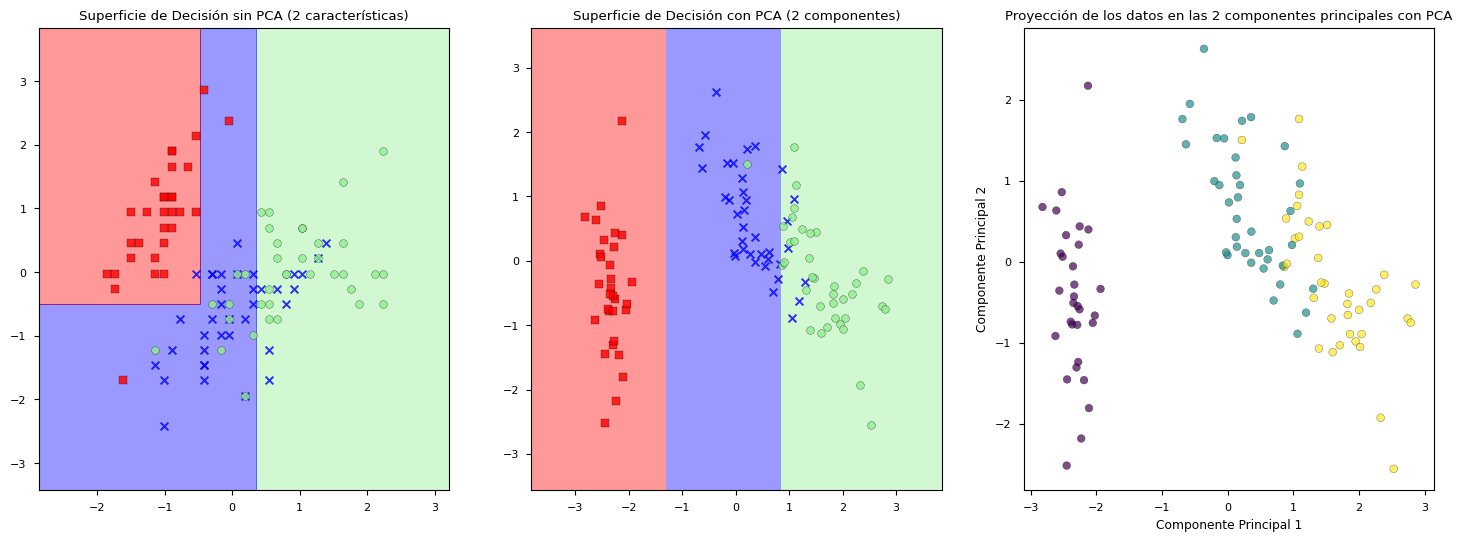

Precisión sin PCA (todas las características): 1.00
Tiempo de entrenamiento sin PCA: 0.0015 segundos

Precisión con PCA (2 componentes): 0.93
Tiempo de entrenamiento con PCA: 0.0011 segundos



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

plt.style.use("seaborn-v0_8-paper")

# Función para visualizar las superficies de decisión
def plot_decision_regions(X, y, classifier, resolution=0.02, ax=None, title="Model"):
    from matplotlib.colors import ListedColormap
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    ax.set_title(title)

    # Plot all samples without specifying edgecolor for unfilled markers
    for idx, cl in enumerate(np.unique(y)):
        if markers[idx] == 'x':  # Eliminar edgecolor para el marcador 'x'
            ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                       alpha=0.8, c=colors[idx],
                       marker=markers[idx], label=f'Class {cl}')
        else:
            ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                       alpha=0.8, c=colors[idx],
                       marker=markers[idx], label=f'Class {cl}',
                       edgecolor='black')

# Cargar el dataset de Iris
data = load_iris()
X = data.data  # Todas las características (4 características originales)
y = data.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelo 1: Sin PCA (usando todas las características originales, con corrección de sobreajuste)
# Aplicar poda limitando la profundidad del árbol y el número mínimo de muestras por hoja
model_no_pca = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=4)

# Medir el tiempo de entrenamiento y precisión sin PCA
start_time_no_pca = time.time()
model_no_pca.fit(X_train_scaled, y_train)
time_no_pca = time.time() - start_time_no_pca

# Predicción y precisión sin PCA
y_pred_no_pca = model_no_pca.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)

### Modelo 2: Con PCA (reduciendo a 2 componentes principales)
# Aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Aplicar poda al modelo con PCA para evitar sobreajuste
model_pca = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=4)

# Medir el tiempo de entrenamiento y precisión con PCA
start_time_pca = time.time()
model_pca.fit(X_train_pca, y_train)
time_pca = time.time() - start_time_pca

# Predicción y precisión con PCA
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

### Gráficos: Superficie de decisión y proyección PCA

# Crear subplots para comparar los modelos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Superficie de decisión sin PCA (usando las primeras 2 características originales solo para la visualización)
# Usamos un modelo entrenado con solo las primeras 2 características para visualización
X_train_2d = X_train_scaled[:, :2]  # Seleccionar las primeras 2 características
X_test_2d = X_test_scaled[:, :2]

# Entrenamos un nuevo modelo solo con las 2 primeras características para visualizar la superficie de decisión
model_no_pca_2d = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_leaf=4)
model_no_pca_2d.fit(X_train_2d, y_train)

plot_decision_regions(X_train_2d, y_train, classifier=model_no_pca_2d, ax=axes[0], title="Superficie de Decisión sin PCA (2 características)")

# Superficie de decisión con PCA (usando las 2 componentes principales)
plot_decision_regions(X_train_pca, y_train, classifier=model_pca, ax=axes[1], title="Superficie de Decisión con PCA (2 componentes)")

# Visualización de la proyección de PCA
axes[2].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', alpha=0.7)
axes[2].set_title("Proyección de los datos en las 2 componentes principales con PCA")
axes[2].set_xlabel("Componente Principal 1")
axes[2].set_ylabel("Componente Principal 2")

plt.show()

### Resultados: Comparación de tiempo y precisión
print(f"Precisión sin PCA (todas las características): {accuracy_no_pca:.2f}")
print(f"Tiempo de entrenamiento sin PCA: {time_no_pca:.4f} segundos\n")

print(f"Precisión con PCA (2 componentes): {accuracy_pca:.2f}")
print(f"Tiempo de entrenamiento con PCA: {time_pca:.4f} segundos\n")



# Reducción de Dimensionalidad con PCA: Comparación de Modelos Usando Todas las Características vs. PCA

### Autor: ***Felipe Meza-Obando***

### Introducción

La reducción de dimensionalidad es una técnica clave en Machine Learning cuando se trabaja con datos de alta dimensionalidad. En este notebook, exploraremos el uso de **PCA (Análisis de Componentes Principales)** para reducir la dimensionalidad de un conjunto de datos de imágenes de caras, y compararemos el rendimiento y el tiempo de entrenamiento de un modelo entrenado con:

1. **Todas las características originales** de las imágenes (4096 características por imagen).
2. **Componentes principales** generadas por PCA, reduciendo las características a un conjunto más pequeño de 100 componentes.

El dataset que utilizaremos es el **dataset de caras de Olivetti**, que contiene 400 imágenes de 40 personas, con cada imagen representada por 64x64 píxeles (4096 características).

### Objetivos

1. **Comparar la precisión de los modelos**:
   - Entrenar un modelo de clasificación (SVM) utilizando todas las características originales de las imágenes.
   - Entrenar el mismo modelo utilizando una versión reducida de las características generada por PCA.
   - Comparar la precisión de ambos modelos en el conjunto de prueba.

2. **Comparar el tiempo de entrenamiento**:
   - Medir y comparar el tiempo de entrenamiento del modelo usando todas las características originales frente al tiempo de entrenamiento del modelo utilizando PCA con 100 componentes.

3. **Visualizar la reducción de dimensionalidad**:
   - Mostrar cómo PCA reduce las características y aún así retiene la mayor parte de la información visual importante.
   - Visualizar las imágenes originales junto a sus versiones reconstruidas a partir de los 100 componentes principales.




Precisión usando las características originales: 0.97
Tiempo de entrenamiento usando las características originales: 0.1829 segundos
Precisión usando PCA (100 componentes): 0.97
Tiempo de entrenamiento usando PCA: 0.0377 segundos


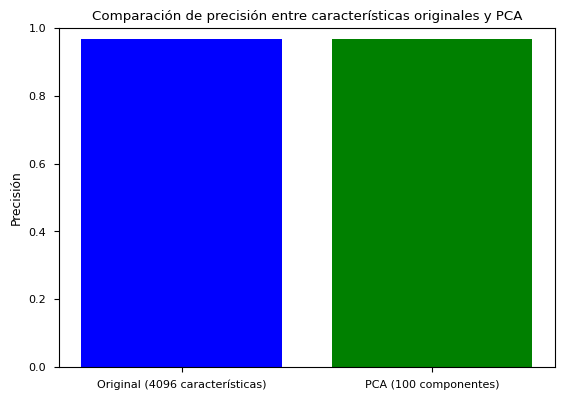

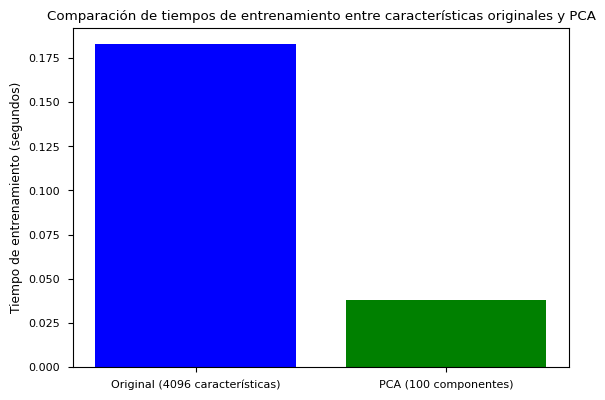

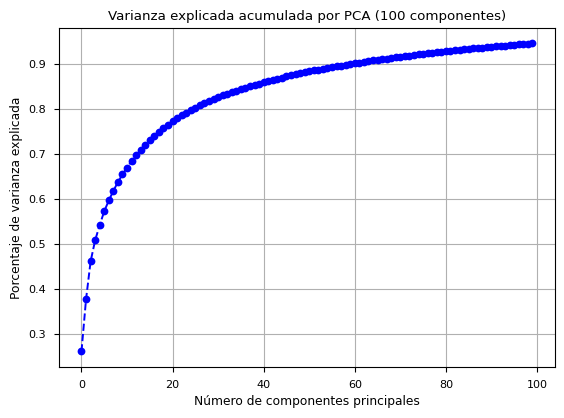

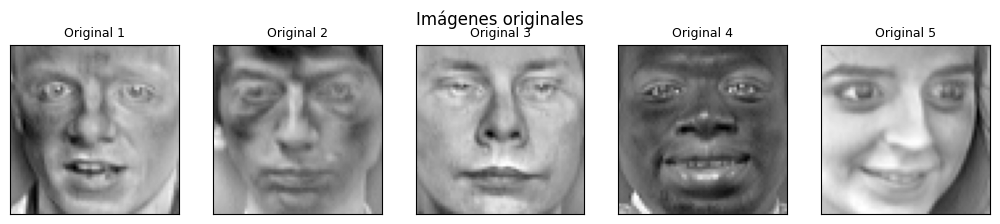

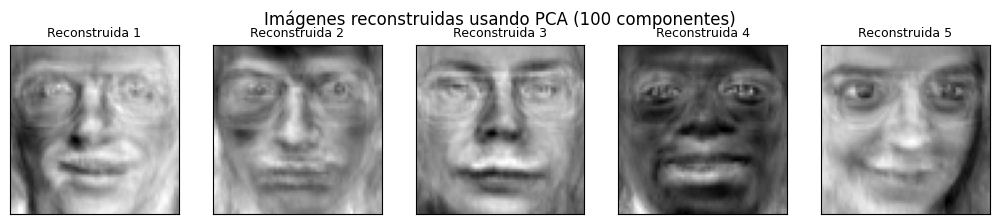

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

plt.style.use("seaborn-v0_8-paper")

# Cargar el dataset de caras de Olivetti
faces = fetch_olivetti_faces()
X = faces.data  # Cada imagen tiene 64x64 píxeles, es decir, 4096 características
y = faces.target  # Etiquetas de las personas (40 individuos)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelo 1: Usar todas las características originales (4096 características)
model_original = SVC(kernel='linear', random_state=42)

# Medir el tiempo de entrenamiento con las características originales
start_time_original = time.time()
model_original.fit(X_train_scaled, y_train)
time_original = time.time() - start_time_original

# Predicción y precisión usando características originales
y_pred_original = model_original.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test, y_pred_original)

print(f"Precisión usando las características originales: {accuracy_original:.2f}")
print(f"Tiempo de entrenamiento usando las características originales: {time_original:.4f} segundos")

### Modelo 2: Usar PCA para reducir las características a 100 componentes principales
pca = PCA(n_components=100)

# Ajustar PCA en el conjunto de entrenamiento y transformar los datos
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Entrenar el modelo usando las 100 componentes principales
model_pca = SVC(kernel='linear', random_state=42)

# Medir el tiempo de entrenamiento con PCA
start_time_pca = time.time()
model_pca.fit(X_train_pca, y_train)
time_pca = time.time() - start_time_pca

# Predicción y precisión usando PCA
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Precisión usando PCA (100 componentes): {accuracy_pca:.2f}")
print(f"Tiempo de entrenamiento usando PCA: {time_pca:.4f} segundos")

### Comparación de tiempos y precisión

# Graficar la comparación de precisión
plt.bar(['Original (4096 características)', 'PCA (100 componentes)'],
        [accuracy_original, accuracy_pca], color=['blue', 'green'])
plt.title("Comparación de precisión entre características originales y PCA")
plt.ylabel("Precisión")
plt.ylim(0, 1)
plt.show()

# Graficar la comparación de tiempos
plt.bar(['Original (4096 características)', 'PCA (100 componentes)'],
        [time_original, time_pca], color=['blue', 'green'])
plt.title("Comparación de tiempos de entrenamiento entre características originales y PCA")
plt.ylabel("Tiempo de entrenamiento (segundos)")
plt.show()

### Gráfico de las componentes principales explicadas por PCA
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(explained_variance, marker='o', linestyle='--', color='b')
plt.title('Varianza explicada acumulada por PCA (100 componentes)')
plt.xlabel('Número de componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.grid(True)
plt.show()

### Visualización de algunas imágenes originales y sus reconstrucciones usando PCA
def plot_faces(images, titles, h, w, n_row=1, n_col=5):
    """Función para graficar una matriz de imágenes."""
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=9)
        plt.xticks(())
        plt.yticks(())

# Reconstrucción de las imágenes usando las componentes principales
X_test_reconstructed = pca.inverse_transform(X_test_pca)

# Mostrar solo 5 imágenes
n_faces = 5  # Número de caras a mostrar
h, w = faces.images.shape[1:3]

# Títulos para las imágenes originales
titles_original = [f'Original {i+1}' for i in range(n_faces)]

# Títulos para las imágenes reconstruidas
titles_reconstructed = [f'Reconstruida {i+1}' for i in range(n_faces)]

# Graficar las imágenes originales
plot_faces(X_test_scaled[:n_faces], titles_original, h, w, n_row=1, n_col=5)
plt.suptitle("Imágenes originales")
plt.show()

# Graficar las imágenes reconstruidas con PCA
plot_faces(X_test_reconstructed[:n_faces], titles_reconstructed, h, w, n_row=1, n_col=5)
plt.suptitle("Imágenes reconstruidas usando PCA (100 componentes)")
plt.show()



La **gráfica de varianza explicada** muestra cuánta información o varianza de los datos originales es capturada por las componentes principales de **PCA**. En el eje X se representa el número de componentes principales, mientras que en el eje Y se muestra el porcentaje de varianza acumulada. La curva muestra cómo, a medida que agregas más componentes, capturas más información de los datos, pero eventualmente la curva se aplana, indicando que las nuevas componentes agregan poca información adicional.

Este gráfico es útil para decidir cuántas componentes principales utilizar. Si las primeras pocas componentes capturan la mayor parte de la varianza (por ejemplo, el 90% o más), puedes reducir significativamente la dimensionalidad sin perder mucha información. Esto permite mejorar la eficiencia computacional sin comprometer gravemente el rendimiento del modelo.

Veamos ahora con otro dataset...

Precisión usando las características originales: 0.84
Tiempo de entrenamiento usando las características originales: 29.6850 minutos
Precisión usando PCA (200 componentes): 0.85
Tiempo de entrenamiento usando PCA: 13.1457 minutos


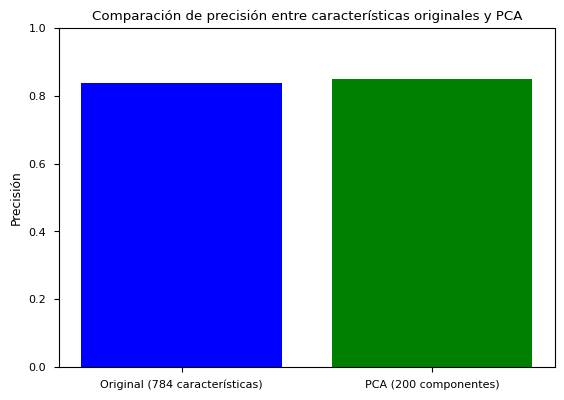

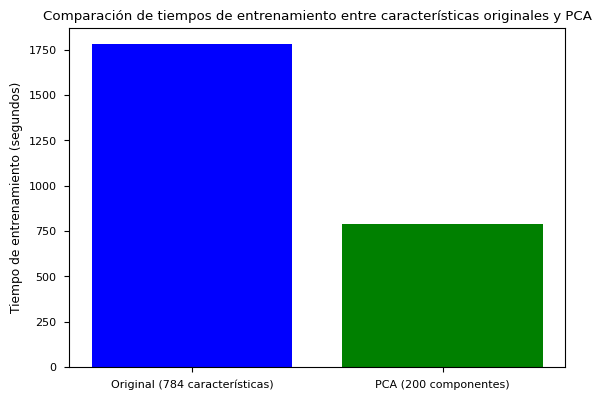

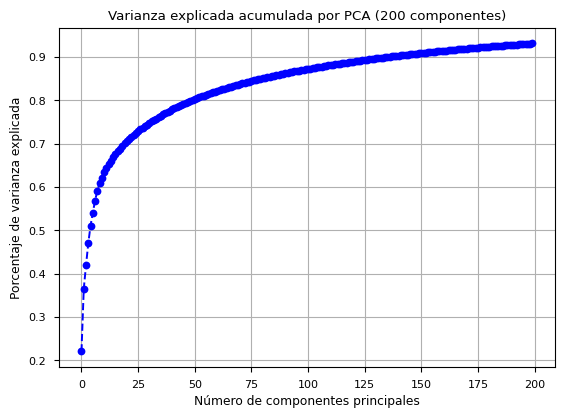

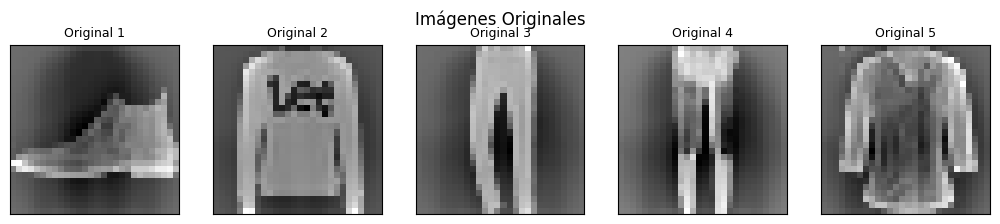

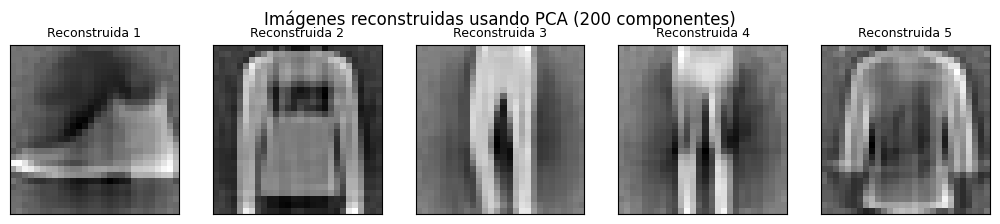

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import fashion_mnist

plt.style.use("seaborn-v0_8-paper")

# Cargar el dataset de Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Redimensionar las imágenes a un vector de 784 características (28x28 píxeles)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelo 1: Usar todas las características originales (784 características)
model_original = SVC(kernel='linear', random_state=42)

# Medir el tiempo de entrenamiento con las características originales
start_time_original = time.time()
model_original.fit(X_train_scaled, y_train)
time_original = time.time() - start_time_original

# Predicción y precisión usando características originales
y_pred_original = model_original.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test, y_pred_original)

print(f"Precisión usando las características originales: {accuracy_original:.2f}")
print(f"Tiempo de entrenamiento usando las características originales: {time_original / 60:.4f} minutos")

### Modelo 2: Usar PCA para reducir las características a 200 componentes principales
pca = PCA(n_components=200)

# Ajustar PCA en el conjunto de entrenamiento y transformar los datos
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Entrenar el modelo usando las 200 componentes principales
model_pca = SVC(kernel='linear', random_state=42)

# Medir el tiempo de entrenamiento con PCA
start_time_pca = time.time()
model_pca.fit(X_train_pca, y_train)
time_pca = time.time() - start_time_pca

# Predicción y precisión usando PCA
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Precisión usando PCA (200 componentes): {accuracy_pca:.2f}")
print(f"Tiempo de entrenamiento usando PCA: {time_pca / 60:.4f} minutos")

### Comparación de tiempos y precisión

# Graficar la comparación de precisión
plt.bar(['Original (784 características)', 'PCA (200 componentes)'],
        [accuracy_original, accuracy_pca], color=['blue', 'green'])
plt.title("Comparación de precisión entre características originales y PCA")
plt.ylabel("Precisión")
plt.ylim(0, 1)
plt.show()

# Graficar la comparación de tiempos
plt.bar(['Original (784 características)', 'PCA (200 componentes)'],
        [time_original, time_pca], color=['blue', 'green'])
plt.title("Comparación de tiempos de entrenamiento entre características originales y PCA")
plt.ylabel("Tiempo de entrenamiento (segundos)")
plt.show()

### Gráfico de las componentes principales explicadas por PCA
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(explained_variance, marker='o', linestyle='--', color='b')
plt.title('Varianza explicada acumulada por PCA (200 componentes)')
plt.xlabel('Número de componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.grid(True)
plt.show()

### Visualización de algunas imágenes originales y sus reconstrucciones usando PCA
def plot_images(images, titles, n_row=1, n_col=5):
    """Función para graficar una matriz de imágenes."""
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((28, 28)), cmap=plt.cm.gray)
        plt.title(titles[i], size=9)
        plt.xticks(())
        plt.yticks(())

# Reconstrucción de las imágenes usando las componentes principales
X_test_reconstructed = pca.inverse_transform(X_test_pca)

# Mostrar solo 5 imágenes
n_images = 5  # Número de imágenes a mostrar

# Títulos para las imágenes originales
titles_original = [f'Original {i+1}' for i in range(n_images)]

# Títulos para las imágenes reconstruidas
titles_reconstructed = [f'Reconstruida {i+1}' for i in range(n_images)]

# Graficar las imágenes originales
plot_images(X_test_scaled[:n_images], titles_original)
plt.suptitle("Imágenes Originales")
plt.show()

# Graficar las imágenes reconstruidas con PCA
plot_images(X_test_reconstructed[:n_images], titles_reconstructed)
plt.suptitle("Imágenes reconstruidas usando PCA (200 componentes)")
plt.show()

